Tarea de Raimundo Herrera e Ignacio Guridi

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, TimeDistributed, Flatten, SimpleRNN,LSTM

Using TensorFlow backend.


airlineUtils.py

In [0]:
#!/usr/bin/env python
import pandas
import numpy
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


def readAirlineData(history):
    # load the dataset
    dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # split into train and test sets
    train_size = 96 #Enero 1949 a Diciembre 1956
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, history)
    testX, testY = create_dataset(test, history)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1],1))
    return trainX, trainY, testX, testY, scaler, dataset


def displayResult(dataset, trainPredict, trainY, testPredict, testY, scaler, history):
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[history:len(trainPredict)+history, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(history*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

## Parte 1

### Actividad 1

In [0]:
modelRNN = Sequential()
modelRNN.add(SimpleRNN(5, return_sequences=False, input_shape=(4, 1)))
modelRNN.add(Dense(1))
modelRNN.save_weights('model_weights')
modelRNN.summary()

W0706 19:55:37.167780 140531540703104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 19:55:37.205899 140531540703104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 19:55:37.212209 140531540703104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 19:55:37.328779 140531540703104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0706 19:55:37.329943 1405315407

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


La cantidad de parámetros es: un vector de dimensión 5 compuesto (ergo, 5 parámetros) para transformar de un input de 1 dimensión a la dimensión interna de 5 de la red. Luego,  de un estado intermedio al siguiente estado intermedio se mantiene la dimensión. Por esto, se usa una matriz de 5x5, lo que implica 25 parámetros más. Luego, para hacer el paso del estado intermedio al output de 5 dimensiones se utiliza una matriz diagonal, lo que suma 5 parámetros más, para llegar a una cantidad de 35 para la capa de `simpleRNN`. Luego, la red densa le agrega 5 parámetros más (los mismos que la dimensión de salida de la red anterior) más uno de bias. Por lo tanto, en total son 41 parámetros, datos que coinciden con los arrojados utilizando la función `summary()` de Keras.

Con esto se puede concluir que los parámetros totales de esta red son, con variables generales: 

$\alpha$: dimensión del estado intermedio

$\beta$: dimensión del input

$\gamma$: dimensión del output

total parámetros :

$$\alpha^2 + \beta \times \alpha +  \alpha \times \gamma + (\alpha +  1)$$

Sea una red con estado intermedio de dimensión 4, entonces el total de parámetros será:

$$4^2 + 1 \times 4 + 4 \times 1 + (4 + 1) = 29$$

tal como se comprueba con la función `summary` de Keras






In [0]:
modelRNN = Sequential()
modelRNN.add(SimpleRNN(4, return_sequences=False, input_shape=(4, 1)))
modelRNN.add(Dense(1))
modelRNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


### Actividad 2

In [0]:
#modelRNN.add(Dense(1))
# modelRNN.summary()

In [0]:
%%capture ;
!  wget --output-document='international-airline-passengers.csv' 'https://drive.google.com/a/uc.cl/uc?id=1ZKAaRDnTNDXb84YDunm-WZBQ7mPR6hqY&export=download'

In [0]:
def airline_prediction(history):
    #read training and test sets
    trainX, trainY, testX, testY, scaler, dataset=readAirlineData(history)
    # create and fit the LSTM network
    modelRNN = Sequential()
    modelRNN.add(SimpleRNN(5, input_shape=(history, 1), return_sequences=False))
    modelRNN.add(Dense(1))
    modelRNN.load_weights('model_weights', by_name=True)

    #Train model
    modelRNN.compile(loss='mean_squared_error', optimizer='adam')
    modelRNN.fit(trainX, trainY, epochs=150, batch_size=5, verbose=2, shuffle=False)

    # Make predictions
    trainPredict = modelRNN.predict(trainX)
    testPredict = modelRNN.predict(testX)
    return dataset, trainPredict, trainY, testPredict, testY, scaler
    

Se tiene que no da resultados iguales cada vez que se corre pues el modelo Sequential de keras por default desordena las secuencias del set de entrenamiento. No desordena datos individuales entre sí, pero si lo hace entre conjuntos de datos. Esto hace que el método de entrenamiento basado en esa información siga siendo consistente, pero no garantiza que el resultado final sea el mismo, pues no está siendo entrenado de la misma manera. 

#### history = 4

In [0]:
%%capture
#set sequence length
history = 4
dataset, trainPredict, trainY, testPredict, testY, scaler = airline_prediction(history)

Train Score: 21.31 RMSE
Test Score: 53.99 RMSE


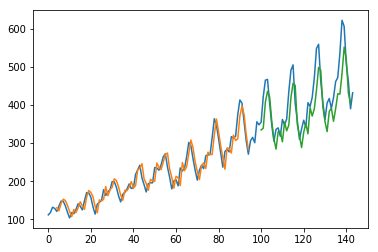

In [0]:
#Display results
displayResult(dataset, trainPredict, trainY, testPredict, testY, scaler, history)

In [0]:
%%capture
#set sequence length
history = 24
dataset, trainPredict, trainY, testPredict, testY, scaler = airline_prediction(history)

Train Score: 23.69 RMSE
Test Score: 85.08 RMSE


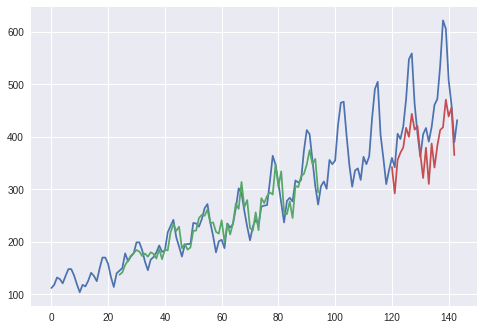

In [0]:
#Display results
displayResult(dataset, trainPredict, trainY, testPredict, testY, scaler, history)

In [0]:
%%capture
#set sequence length
history = 12
dataset, trainPredict, trainY, testPredict, testY, scaler = airline_prediction(history)

Train Score: 20.20 RMSE
Test Score: 62.67 RMSE


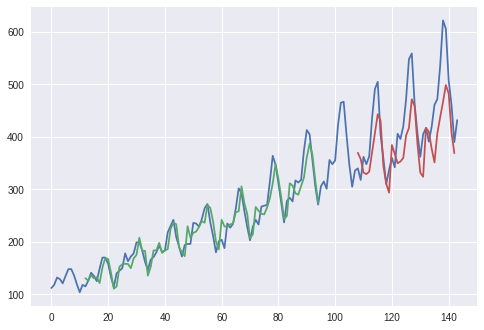

In [0]:
#Display results
displayResult(dataset, trainPredict, trainY, testPredict, testY, scaler, history)

Para estos casos, a mayor largo de la secuencia peor rendimiento. sin embargo, este es un factor difícil de medir, debido a la alta volatilidad de resultados bajo las mismas condiciones. Además, el número de épocas de entrenamiento pareciera afectar más a secuencias más largas, que necesitan de mayor número de iteraciones para aprender de la información. Es por esto que solo se puede concluir que secuencias de largo 4 por lo general dan mejores resultados para este caso específico. Sin embargo, cambiar algún aspecto cualquiera tal como número de épocas o batch_size puede hacer que esta situación ya no se cumpla. 

#### Dense 100 layer

In [0]:
def airline_prediction_100dense(history):
    #read training and test sets
    trainX, trainY, testX, testY, scaler, dataset=readAirlineData(history)

    # create and fit the LSTM network
    modelRNN = Sequential()
    modelRNN.add(SimpleRNN(20, input_shape=(history, 1), return_sequences=False))
    #modelRNN.add(Dropout(0.2))
    modelRNN.add(Dense(100, activation='relu'))
    #modelRNN.add(Dropout(0.2))
    modelRNN.add(Dense(1))

    #Train model
    modelRNN.compile(loss='mean_squared_error', optimizer='adam')
    modelRNN.fit(trainX, trainY, epochs=150, batch_size=5, verbose=2)

    # Make predictions
    trainPredict = modelRNN.predict(trainX)
    testPredict = modelRNN.predict(testX)
    return dataset, trainPredict, trainY, testPredict, testY, scaler

In [0]:
%%capture
#set sequence length
history = 4
dataset, trainPredict, trainY, testPredict, testY, scaler = airline_prediction_100dense(history)

Train Score: 16.88 RMSE
Test Score: 49.04 RMSE


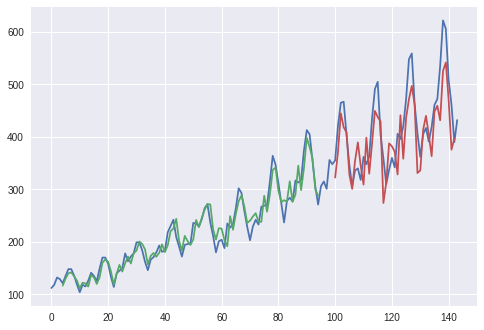

In [0]:
#Display results
displayResult(dataset, trainPredict, trainY, testPredict, testY, scaler, history)

Agregar una capa densa de 100 neuronas produce una mejora promedio de los resultados. Esto es logrado una vez que se agranda las dimesiones de la capa interna del módulo RNN de la red, de forma que tener una capa densa de 100 neuronas tenga sentido. 

#### Dropout

In [0]:
def airline_prediction_dropout(history):
    #read training and test sets
    trainX, trainY, testX, testY, scaler, dataset=readAirlineData(history)

    # create and fit the LSTM network
    modelRNN = Sequential()
    modelRNN.add(SimpleRNN(50, input_shape=(history, 1), return_sequences=False))
    modelRNN.add(Dropout(0.2))
    modelRNN.add(Dense(1))

    #Train model
    modelRNN.compile(loss='mean_squared_error', optimizer='adam')
    modelRNN.fit(trainX, trainY, epochs=150, batch_size=5, verbose=2)

    # Make predictions
    trainPredict = modelRNN.predict(trainX)
    testPredict = modelRNN.predict(testX)
    return dataset, trainPredict, trainY, testPredict, testY, scaler

In [0]:
%%capture
#set sequence length
history = 4
dataset, trainPredict, trainY, testPredict, testY, scaler = airline_prediction_dropout(history)

Train Score: 21.63 RMSE
Test Score: 45.43 RMSE


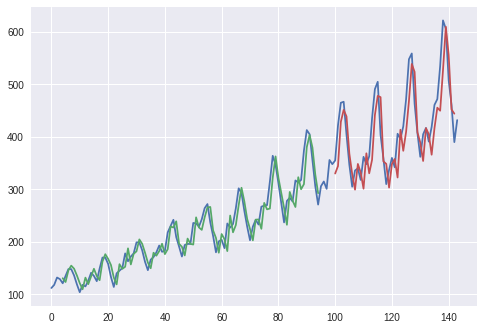

In [0]:
#Display results
displayResult(dataset, trainPredict, trainY, testPredict, testY, scaler, history)

Añadirle dropout conlleva una mejora significativa de los resultados de test, comparado con la red sin esto.  Esto se debe a el aumento de la capacidad generalizadora de la red provocado por el dropout. Como la capa de 100 neuronas, para que esta tenga un efecto positivo se debe aumentar las dimensiones de la salida del módulo RNN. Esto es debido a que, al usar solo las 5 dimensiones dadas por el enunciado de esta tarea,  al aplicar dropout la información es llevada por muy pocas neuronas, con la consiguiente pérdida de detalle de las predicciones. 

### Actividad 3

In [0]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(5, input_shape=(history, 1), return_sequences=False))
modelLSTM.add(Dense(1))
modelLSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [0]:
def airline_prediction_LSTM(history):
    #read training and test sets
    trainX, trainY, testX, testY, scaler, dataset=readAirlineData(history)

    # create and fit the LSTM network
    modelRNN = Sequential()
    modelRNN.add(LSTM(10, input_shape=(history, 1), return_sequences=False))
    modelRNN.add(Dense(1))

    #Train model
    modelRNN.compile(loss='mean_squared_error', optimizer='adam')
    modelRNN.fit(trainX, trainY, epochs=1000, batch_size=5, verbose=2)

    # Make predictions
    trainPredict = modelRNN.predict(trainX)
    testPredict = modelRNN.predict(testX)
    return dataset, trainPredict, trainY, testPredict, testY, scaler

In [0]:
%%capture
#set sequence length
history = 12
dataset, trainPredict, trainY, testPredict, testY, scaler = airline_prediction_LSTM(history)

Train Score: 11.17 RMSE
Test Score: 97.13 RMSE


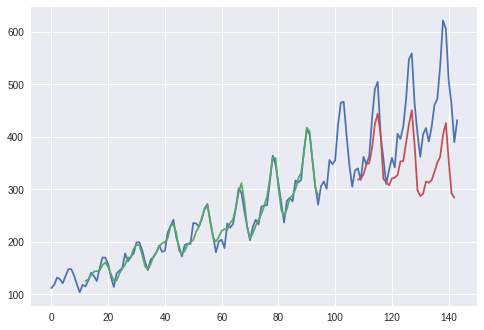

In [0]:
#Display results
displayResult(dataset, trainPredict, trainY, testPredict, testY, scaler, history)

Se tiene que con LSTM los resultados son iguales o peores, comparándolo con el largo de sequencia respectivo de modelo que usa simpleRNN. Esto se puede deber a dos cosas: una es la mayor cantidad de parámetros por entrenar, lo que necesita más tiempo y data para que produzca resultados aceptables. 

## Parte 2

### Actividad 4
El desarrollo de esta sección fue apoyado fuertemente en [este artículo]( https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/)

Esta diseño de red se caracteriza por ser lo más pequeña posible, pero que a la vez, permita en un principio tener un rendimiento aceptable. Esto además,  da una visión sobre el potencial y las capacidades de las LSTM RNN. 

Los parámetros se mantuvieron los del ejemplo guía, pues es poco probable que se logre una mejora de rendimiento significativa si se mantiene la estructura original de la red

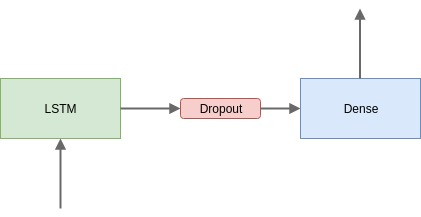

In [0]:
# from IPython.display import Image, display
# display(Image("LSTM.jpg"))

### Actividad 5

In [0]:
import sys
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
%%capture
!  wget --output-document='quijote.txt' 'https://drive.google.com/a/uc.cl/uc?authuser=0&id=16PjMr1c0hvZVZHmZx8WRqp2kvVYkPts1&export=download'

En esta celda se pule el texto a trabajar. Siendo que el enfoque está en estudiar el potencial de la red, se quitarán todos los símbolos que no correspondan a una letra del alfabeto, y las letras mayúsculas se reemplazarán por su correspondiente minúscula. De esta forma el problema se hace más simple y manejable. 

In [0]:
with open('quijote.txt') as f:
    raw_text = f.read()

raw_text = raw_text.replace('\n', ' ')
raw_text = raw_text.lower()
raw_text = raw_text.replace('  ', ' ')
raw_text = raw_text.replace('  ', ' ')

weird_chars = '\.|\?|\¿|\¡|\!|"|;|,'

import re
raw_text = re.sub(weird_chars, '', raw_text)

In [0]:
# prepare the dataset of input to output pairs encoded as integers
chars = sorted(list(set(raw_text)))
n_categories = len(chars)
print('Total distinct characters: ', n_categories)
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

seq_length = 100 # arbitrary length
# this is to make vecotrs of the same length
n_chars = (len(raw_text) // seq_length) * seq_length 

dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append(np_utils.to_categorical([char_to_int[char] for char in seq_in], n_categories))
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print('Total Patterns: ', n_patterns)


total distinct characters:  31
Total Patterns:  300900


In [0]:
from keras.callbacks import ModelCheckpoint
# reshape X to be [samples, time steps, features (length of one hot encoding)]
X = np.reshape(dataX, (n_patterns, seq_length, len(dataX[0][0])))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [0]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
filename = 'weights-improvement-01-1.4287.hdf5'
model.load_weights(filename)

In [0]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
model.fit(X, y, epochs=3, batch_size=128, callbacks=callbacks_list)

In [0]:
from google.colab import files
if 0:
    files.download('weights-improvement-03-1.0974.hdf5')
if 0:
    files.upload()

### Actividad 6

In [0]:
# 5 epochs
import sys
if 0:
    filename = 'weights-improvement-05-2.1799.hdf5'
    model.load_weights(filename)
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print('Seed:')
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nDone.")

Seed:
"  andantes tienen damas a quien encomendarse, porque no todos son enamorados    eso no puede ser, res "
pondio don quijote, que eo el caballero  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue e

o el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caballoro  q sue eo el caba
Done.


Primero se intentó con un modelo que recibe número enteros como input. Sin embargo, los resultados está lejos de los esperados, con mucha repetición y formando palabras que no existen. Por lo tanto se decidió seguir el consejo de la literatura y del enunciado y usar onehot encoding para el input.

In [0]:
def prediction_onehot(pattern, model, length_prediction):
    for i in range(length_prediction):
        x = np.reshape(pattern, (1, len(pattern), len(pattern[0])))
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)
        result = int_to_char[index]
        sys.stdout.write(result)
        pattern = np.concatenate([pattern, np_utils.to_categorical([index], n_categories)])
        pattern = pattern[1:len(pattern)]

In [0]:
# 3 epochs one hot
if 0:
    filename = 'weights-improvement-03-1.2062.hdf5'
    model.load_weights(filename)
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print('Seed:')
print("\"", ''.join([int_to_char[np.argmax(vector, axis=None, out=None)] for vector in pattern]), "\"")
# generate characters
prediction_onehot(pattern, model, 400)
print("\nDone.")

Seed:
" eo que en nosotros nacio de remedialla si pudieramos os rogamos oh discreto ambrosio a lo menos yo o "
tra merced que el caballero de la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano

 a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a la mano a
Done.


Al usar onehot para la entrada las cosas mejoraron considerablemente. esto se vio desde la tercera época en la que superó ya con creces el desempeño de el modelo que usa números enteros como entrada. 

In [0]:
!ls

datalab				    weights-improvement-02-1.1641.hdf5
quijote.txt			    weights-improvement-02-1.2316.hdf5
weights-improvement-01-1.1276.hdf5  weights-improvement-02-1.3265.hdf5
weights-improvement-01-1.1846.hdf5  weights-improvement-03-1.0974.hdf5
weights-improvement-01-1.2588.hdf5  weights-improvement-03-1.1430.hdf5
weights-improvement-01-1.3715.hdf5  weights-improvement-03-1.2062.hdf5
weights-improvement-01-1.4287.hdf5  weights-improvement-03-1.2903.hdf5
weights-improvement-02-1.1120.hdf5


In [0]:
# 10 epochs one hot
if 1:
    filename = 'weights-improvement-02-1.1641.hdf5'
    model.load_weights(filename)
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print('Seed:')
print("\"", ''.join([int_to_char[np.argmax(vector, axis=None, out=None)] for vector in pattern]), "\"")
# generate characters
prediction_onehot(pattern, model, 400)
print("\nDone.")

Seed:
" cuidad de su caballo porque era la mejor pieza que comia pan en el mundo  mirole el ventero y no le  "
parecio que el pastor de la mancha la pastora mas que esta en el mundo y a la mancha la alguna y el caballero andante como el cual se llamaba el cual se le acomete y al caballero del camino y al caballero del cabrero de la mancha que estaba en el mundo y a la mancha la alguna y el caballero andante como el cual se llamaba el cual se le acomete y al caballero del camino y al caballero del cabrero d
Done.


El modelo entrenado con 10 épocas fue el con mejor desempeño. Como se puede observar, reconoce el género del sujeto ("el pastor", "la pastora"). Por cierto, cae en un loop, como la mayoría de los modelos entrenados. Este loop es:

"y el caballero andante como el cual se llamaba el cual se le acomete y al caballero del camino y al caballero del cabrero de la mancha que estaba en el mundo y a la mancha la alguna"

Coomo se puede ver es un loop de 181 caracteres, casi el doble de la sequencia que toma la red para predecir, que es 100 carácteres hacia atrás, lo que se puede interpretar como una buena señal

Cabe destacar que todas las palabras escritas existen, y que no hay errores de ortografía.



In [0]:
# 13 epochs one hot
if 1:
    filename = 'weights-improvement-03-1.0974.hdf5'
    model.load_weights(filename)
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]

## uncomment this if it is to be tried with a external sequence of text. 
## keep in mind it's length has to be of exactly 100
# seq_in = 'habia una vez cinco gatos silvestres que estaban en un bosque de forma pues lo unico que tenian que '
# pattern = np_utils.to_categorical([char_to_int[char] for char in seq_in], n_categories)

print('Seed:')
print("\"", ''.join([int_to_char[np.argmax(vector, axis=None, out=None)] for vector in pattern]), "\"")
# generate characters
prediction_onehot(pattern, model, 200)
print("\nDone.")

Seed:
" e rocinante al cual tomo de la rienda y del cabestro al asno y se encamino hacia su pueblo bien pens "
aba de hacer la verdad y asi se le acomete de su amo y asi se le acomete de su amo y asi se le acomete de su amo y asi se le acomete de su amo y asi se le acomete de su amo y asi se le acomete de su a
Done.


Se intentó seguir entrenando la red hasta el límite de su capacidad. Sin embargo, aunque el error de la validación bajó (de 1.16 a 1.09) su desempeño con las pruebas que se le hicieron fue menos satisfactorios. Como se ve en el output superior, el loop es mucho más corto ("y asi se le acomete de su amo") . Además, no se advierte un mayor entendimiento del lenguaje con respecto al modelo entrenado con solo 10 épocas. 

## Parte 3

#### Actividad 7

La creación del modelo fue inspirada en [este proyecto](https://github.com/Rahulrt7/Machine-comprehension-Keras) por Rahulrt7. 

In [0]:
from google.colab import files
files.upload()

Saving red3.jpg to red3 (1).jpg


{'red3.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x01\xff\x01\x19\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x01\x00\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x07\x08\x04\x03\x02\x01\t\xff\xc4\x00S\x10\x00\x00\x06\x01\x02\x01\x05\t\r\x04\x07\x06\x05\x05\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x11\x12\x13\x14\x17!V\x08\x16"1u\x93\x95\xd2\xd4\x15267ARUW\x96\xa4\xb3\xb5\xd3#Qa\xb4$348qtvB

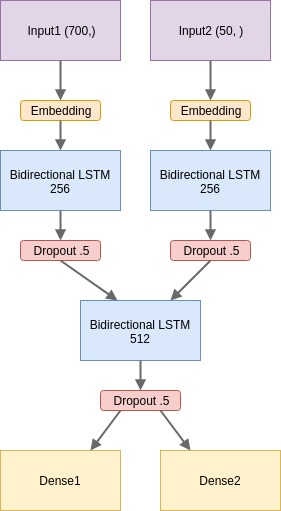

In [0]:
from IPython.display import Image, display
display(Image("red3 (1).jpg"))

**Actividad 8**

Por completitud se incluye todo el código y pruebas realizadas para la parte del dataset SQuAD. Este modelo no se pudo probar más allá de lo presentado a continuación, no quisimos entregar esta sección vacia puesto que no reflejaría las horas de esfuerzo puestas en esta actividad y la siguiente.

Se modeló según el link incluido anteriormente y además se logró entrenar en un par de épocas el modelo descrito, sin embargo, no se logró probar el resultado dado por lo obtenido.

Además notar que la implementación de keras en la seccion "modelo embedding" corresponde a la imagen incluida anteriormente.

In [0]:
import json
import numpy as np
import string
import re
import h5py

In [0]:
%%capture ;
!  wget --output-document='train-v1.1.json' 'https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json'

In [0]:
with open('train-v1.1.json') as json_data:
    d = json.load(json_data)

In [0]:
dataset = d['data']

In [0]:
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

In [0]:
# stores word to index
word_dict = {}
#stores index to word
ind_dict = {}

index = 1

In [0]:
def modify(cont):
    global index
    temp_list = []
    temp_str = ""
    for i in range(len(cont)):
        if cont[i] == '"' or cont[i] == '/' or cont[i] == ';' or cont[i] == ',':
            continue
                        
        if cont[i] == '?' or cont[i] == ' ' or cont[i] == '.':
            if cont[i] == ',' or cont[i] == '.' or cont[i] == '?':
                i += 1
                            
            word = temp_str.lower()
            temp_str = ""
            temp_index = 0
                        
            if word not in word_dict:
                word_dict[word] = index
                ind_dict[index] = word
                temp_index = index
                index += 1
            else:
                temp_index = word_dict[word]
                            
            temp_list.append(temp_index)
        else:
            temp_str += cont[i]
    return temp_list

In [0]:
context_list = []
question_list = []
answer_list = []
answer_begin = []
answer_end = []
id_list = []

for article in dataset:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            id_list.append(qa['id'])
            for ans in qa['answers']:
                # append both context and questions many times for more than one question/answer
                ques = qa['question']
                if len(modify(ques)) < 50:
                    question_list.append(modify(ques))
                    cont = paragraph['context']
                    context_list.append(modify(cont))
                
                    an = ans['text']
                    answer_list.append(modify(an))
                
                    answer_begin.append(ans['answer_start'])
                    answer_end.append(ans['answer_start']+len(ans['text']))

In [0]:
context_array = np.zeros((len(context_list), 700), dtype=np.int)
question_array = np.zeros((len(question_list), 50), dtype=np.int)
answer_array = np.zeros((len(answer_list), 50), dtype=np.int)
begin_array = np.zeros((len(answer_begin), ), dtype=np.int)
end_array = np.zeros((len(answer_end), ), dtype=np.int)

for i in range(len(context_list)):
    for j in range(len(context_list[i])):
        context_array[i][j] = context_list[i][j]
        
for i in range(len(question_list)):
    for j in range(len(question_list[i])):
        question_array[i][j] = question_list[i][j]
        
        
for i in range(len(answer_list)):
    for j in range(len(answer_list[i])):
        answer_array[i][j] = answer_list[i][j]
            
for i in range(len(answer_begin)):
    begin_array[i] = answer_begin[i]
    
for i in range(len(answer_end)):
    end_array[i] = answer_end[i]


In [0]:
with h5py.File('context.h5', 'w') as hf:
    hf.create_dataset('context', data=context_array)
with h5py.File('questions.h5', 'w') as hf:
    hf.create_dataset('questions', data=question_array)
with h5py.File('answers.h5', 'w') as hf:
    hf.create_dataset('answers', data=answer_array)
with h5py.File('begin.h5', 'w') as hf:
    hf.create_dataset('begin', data=begin_array)
with h5py.File('end.h5', 'w') as hf:
    hf.create_dataset('end', data=end_array)

In [0]:
np.save('word_to_indx.npy', word_dict)
np.save('indx_to_word', ind_dict)

In [0]:
word_dict = np.load('word_to_indx.npy').item()
ind_dict = np.load('indx_to_word.npy').item()

Model chars

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D
from keras.layers import Convolution1D, Embedding
from keras.layers.merge import Concatenate

import json
import numpy as np
import string
import re
import h5py

In [0]:
with open('train-v1.1.json') as json_data:
    d = json.load(json_data)

In [0]:
dataset = d['data']

In [0]:
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

In [0]:
char_dict = {' ':0, 'a':1, 'b':2, 'c':3, 'd':4, 'e':5,'f':6,'g':7,'h':8,'i':9,'j':10,'k':11,'l':12,
            'm':13,'n':14,'o':15,'p':16,'q':17,'r':18,'s':19,'t':20,'u':21,'v':22,'w':23,'x':24,'y':25,'z':26,
            '0':27,'1':28,'2':29,'3':30,'4':31,'5':32,'6':33,'7':34,'8':35,'9':36}

In [0]:
context_list = []
question_list = []

for article in dataset:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            for ans in qa['answers']:
                # append both context and questions many times for more than one question/answer
                
                cont = normalize_answer(paragraph['context'])[:1000]
                temp = []
                for ch in cont:
                    try:
                        temp.append(char_dict[ch])
                    except KeyError:
                        continue
                context_list.append(temp)
                
                ques = normalize_answer(qa['question'])[:50]
                temp = []
                for ch in ques:
                    try:
                        temp.append(char_dict[ch])
                    except KeyError:
                        continue
                    question_list.append(temp)

In [0]:
context_array = np.zeros((len(context_list), 1000), dtype=np.int)
question_array = np.zeros((len(question_list), 50), dtype=np.int)

for i in range(len(context_list)):
    for j in range(len(context_list[i])):
        context_array[i][j] = context_list[i][j]
        
for i in range(len(question_list)):
    for j in range(len(question_list[i])):
        question_array[i][j] = question_list[i][j]

In [0]:
embedding_dim = 50
filter_size = 3
num_filters = 10
dropout = 0.5
hidden_dims = 50
vocab = 27

In [0]:
model = Sequential()
model.add(Embedding(27, embedding_dim, input_length=5000))
model.add(Convolution1D(filters=num_filters, kernel_size=filter_size,
                       activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(1024))

In [0]:
# from google.colab import files
# uploaded = files.upload()
%%capture ;
!  wget --output-document='glove.6B.zip' 'http://nlp.stanford.edu/data/glove.6B.zip'

In [0]:
import zipfile

In [0]:
zip_ref = zipfile.ZipFile('glove.6B.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
f = open('glove.6B.50d.txt')
import numpy as np

embeddings_index = {}
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [0]:
word_index = np.load('word_to_indx.npy').item()

In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, 50))
for word,i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
import h5py
with h5py.File('embeddings_50.h5', 'w') as hf:
    hf.create_dataset('embed', data=embedding_matrix)
with h5py.File('embeddings_50.h5', 'r') as hf:
    embedding_matrix = hf['embed'][:]

Model embeddings

In [0]:
import numpy as np
import h5py

from keras.models import Sequential, Model
from keras.layers import Embedding, Dropout, Dense, Activation
from keras.layers import LSTM, Bidirectional, Merge, Input
from keras.layers import concatenate

In [0]:
# loading data
with h5py.File('context.h5', 'r') as hf:
    context_array = hf['context'][:]
with h5py.File('questions.h5', 'r') as hf:
    question_array = hf['questions'][:]
with h5py.File('begin.h5', 'r') as hf:
    begin_span = hf['begin'][:]
with h5py.File('end.h5', 'r') as hf:
    end_span = hf['end'][:]
    
# loading Glove embeddings
with h5py.File('embeddings_50.h5', 'r') as hf:
    embedding_matrix = hf['embed'][:]
    
# loding vocabulary
word_index = np.load('word_to_indx.npy').item()

In [0]:
vocab_size = len(word_index) + 1
embedding_vector_length = 50
max_span_begin = np.amax(begin_span)
max_span_end = np.amax(end_span)
batch = 64
# slice of data to be used as one epoch training on full data is expensive
slce = 10000

In [0]:
# model1
context_input = Input(shape=(700, ), dtype='int32', name='context_input')
x = Embedding(input_dim=vocab_size, output_dim=50, weights=[embedding_matrix], 
              input_length=700, trainable=False)(context_input)
lstm_out = Bidirectional(LSTM(256, return_sequences=True, implementation=2), merge_mode='concat')(x)
drop_1 = Dropout(0.5)(lstm_out)

In [0]:
# model2
ques_input = Input(shape=(50, ), dtype='int32', name='ques_input')
x = Embedding(input_dim=vocab_size, output_dim=50, weights=[embedding_matrix], 
              input_length=50, trainable=False)(ques_input)
lstm_out = Bidirectional(LSTM(256, return_sequences=True, implementation=2), merge_mode='concat')(x)
drop_2 = Dropout(0.5)(lstm_out)

In [0]:
# merger model
merge_layer = concatenate([drop_1, drop_2], axis=1)
biLSTM = Bidirectional(LSTM(512, implementation=2), merge_mode='mul')(merge_layer)
drop_3 =  Dropout(0.5)(biLSTM)
softmax_1 = Dense(max_span_begin, activation='softmax')(biLSTM)
softmax_2 = Dense(max_span_end, activation='softmax')(biLSTM)

model = Model(inputs=[context_input, ques_input], outputs=[softmax_1, softmax_2])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

from keras.callbacks import ModelCheckpoint
filepath="squad-weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model_history = model.fit([context_array[:slce], question_array[:slce]],
                        [begin_span[:slce], end_span[:slce]], verbose=1,
                         batch_size=batch, epochs=10, callbacks=callbacks_list)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 700)          0                                            
__________________________________________________________________________________________________
ques_input (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 700, 50)      5984650     context_input[0][0]              
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 50)       5984650     ques_input[0][0]                 
__________________________________________________________________________________________________
bidirectio

10000/10000 [==============================] - 875s 88ms/step - loss: 14.0042 - dense_12_loss: 6.9652 - dense_13_loss: 7.0391 - dense_12_acc: 0.0236 - dense_13_acc: 0.0048

Epoch 00001: loss improved from inf to 14.00424, saving model to squad-weights-improvement-01-14.0042.hdf5
Epoch 2/10
  128/10000 [..............................] - ETA: 14:00 - loss: 13.3199 - dense_12_loss: 6.6206 - dense_13_loss: 6.6993 - dense_12_acc: 0.0156 - dense_13_acc: 0.0000e+00

KeyboardInterrupt: ignored

In [0]:
from google.colab import files
# files.download('squad-weights-improvement-01-14.0042.hdf5')

In [0]:
def prediction_onehot(pattern, model, length_prediction):
    for i in range(length_prediction):
        x = np.reshape(pattern, (1, len(pattern), len(pattern[0])))
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)
        result = int_to_char[index]
        sys.stdout.write(result)
        pattern = np.concatenate([pattern, np_utils.to_categorical([index], n_categories)])
        pattern = pattern[1:len(pattern)]